In [1]:
import pandas as pd
import numpy as np
import requests
import json
#from yelp.client import Client
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import http.client

In [2]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

In [3]:
url = 'https://api.themoviedb.org/3/movie/top_rated?api_key=8fbf14afe1d30e175fca8b7efcce5bd2&language=en-US&page=1'
response = requests.get(url)

In [4]:
response.status_code

200

In [5]:
print(response)

<Response [200]>


In [6]:
response.text

'{"page":1,"total_results":7966,"total_pages":399,"results":[{"popularity":11.215,"id":724089,"video":false,"vote_count":921,"vote_average":8.9,"title":"Gabriel\'s Inferno Part II","release_date":"2020-07-31","original_language":"en","original_title":"Gabriel\'s Inferno Part II","genre_ids":[10749],"backdrop_path":"\\/jtAI6OJIWLWiRItNSZoWjrsUtmi.jpg","adult":false,"overview":"Professor Gabriel Emerson finally learns the truth about Julia Mitchell\'s identity, but his realization comes a moment too late. Julia is done waiting for the well-respected Dante specialist to remember her and wants nothing more to do with him. Can Gabriel win back her heart before she finds love in another\'s arms?","poster_path":"\\/pci1ArYW7oJ2eyTo2NMYEKHHiCP.jpg"},{"popularity":12.789,"vote_count":1533,"video":false,"poster_path":"\\/oyG9TL7FcRP4EZ9Vid6uKzwdndz.jpg","id":696374,"adult":false,"backdrop_path":"\\/969BfPHGJcjg2aUv60g5uiiXFzf.jpg","original_language":"en","original_title":"Gabriel\'s Inferno","g

In [7]:
json.loads(response.text)

{'page': 1,
 'total_results': 7966,
 'total_pages': 399,
 'results': [{'popularity': 11.215,
   'id': 724089,
   'video': False,
   'vote_count': 921,
   'vote_average': 8.9,
   'title': "Gabriel's Inferno Part II",
   'release_date': '2020-07-31',
   'original_language': 'en',
   'original_title': "Gabriel's Inferno Part II",
   'genre_ids': [10749],
   'backdrop_path': '/jtAI6OJIWLWiRItNSZoWjrsUtmi.jpg',
   'adult': False,
   'overview': "Professor Gabriel Emerson finally learns the truth about Julia Mitchell's identity, but his realization comes a moment too late. Julia is done waiting for the well-respected Dante specialist to remember her and wants nothing more to do with him. Can Gabriel win back her heart before she finds love in another's arms?",
   'poster_path': '/pci1ArYW7oJ2eyTo2NMYEKHHiCP.jpg'},
  {'popularity': 12.789,
   'vote_count': 1533,
   'video': False,
   'poster_path': '/oyG9TL7FcRP4EZ9Vid6uKzwdndz.jpg',
   'id': 696374,
   'adult': False,
   'backdrop_path': '/9

In [8]:
movie_db = response.text
movie_db = json.loads(movie_db)

In [9]:
movie_db

{'page': 1,
 'total_results': 7966,
 'total_pages': 399,
 'results': [{'popularity': 11.215,
   'id': 724089,
   'video': False,
   'vote_count': 921,
   'vote_average': 8.9,
   'title': "Gabriel's Inferno Part II",
   'release_date': '2020-07-31',
   'original_language': 'en',
   'original_title': "Gabriel's Inferno Part II",
   'genre_ids': [10749],
   'backdrop_path': '/jtAI6OJIWLWiRItNSZoWjrsUtmi.jpg',
   'adult': False,
   'overview': "Professor Gabriel Emerson finally learns the truth about Julia Mitchell's identity, but his realization comes a moment too late. Julia is done waiting for the well-respected Dante specialist to remember her and wants nothing more to do with him. Can Gabriel win back her heart before she finds love in another's arms?",
   'poster_path': '/pci1ArYW7oJ2eyTo2NMYEKHHiCP.jpg'},
  {'popularity': 12.789,
   'vote_count': 1533,
   'video': False,
   'poster_path': '/oyG9TL7FcRP4EZ9Vid6uKzwdndz.jpg',
   'id': 696374,
   'adult': False,
   'backdrop_path': '/9

In [10]:
for key in movie_db.keys():
    print(key)

page
total_results
total_pages
results


In [11]:
movie_db['results']

[{'popularity': 11.215,
  'id': 724089,
  'video': False,
  'vote_count': 921,
  'vote_average': 8.9,
  'title': "Gabriel's Inferno Part II",
  'release_date': '2020-07-31',
  'original_language': 'en',
  'original_title': "Gabriel's Inferno Part II",
  'genre_ids': [10749],
  'backdrop_path': '/jtAI6OJIWLWiRItNSZoWjrsUtmi.jpg',
  'adult': False,
  'overview': "Professor Gabriel Emerson finally learns the truth about Julia Mitchell's identity, but his realization comes a moment too late. Julia is done waiting for the well-respected Dante specialist to remember her and wants nothing more to do with him. Can Gabriel win back her heart before she finds love in another's arms?",
  'poster_path': '/pci1ArYW7oJ2eyTo2NMYEKHHiCP.jpg'},
 {'popularity': 12.789,
  'vote_count': 1533,
  'video': False,
  'poster_path': '/oyG9TL7FcRP4EZ9Vid6uKzwdndz.jpg',
  'id': 696374,
  'adult': False,
  'backdrop_path': '/969BfPHGJcjg2aUv60g5uiiXFzf.jpg',
  'original_language': 'en',
  'original_title': "Gabrie

In [12]:
movie_db_df = pd.DataFrame(movie_db['results'])
movie_db_df

,popularity,id,video,vote_count,vote_average,title,release_date,original_language,original_title,genre_ids,backdrop_path,adult,overview,poster_path
0,11.215,724089,False,921,8.9,Gabriel's Inferno Part II,2020-07-31,en,Gabriel's Inferno Part II,[10749],/jtAI6OJIWLWiRItNSZoWjrsUtmi.jpg,False,Professor Gabriel Emerson finally learns the t...,/pci1ArYW7oJ2eyTo2NMYEKHHiCP.jpg
1,12.789,696374,False,1533,8.8,Gabriel's Inferno,2020-05-29,en,Gabriel's Inferno,[10749],/969BfPHGJcjg2aUv60g5uiiXFzf.jpg,False,An intriguing and sinful exploration of seduct...,/oyG9TL7FcRP4EZ9Vid6uKzwdndz.jpg
2,19.774,644479,False,256,8.7,Dedicated to my ex,2019-11-01,es,Dedicada a mi ex,"[35, 18]",/8g1rUabKleLvovt0Sx6bXgWfC42.jpg,False,"The film tells the story of Ariel, a 21-year-o...",/riAooJrFvVhotyaOgoI0WR7okSe.jpg
3,49.242,278,False,17480,8.7,The Shawshank Redemption,1994-09-23,en,The Shawshank Redemption,"[18, 80]",/iNh3BivHyg5sQRPP1KOkzguEX0H.jpg,False,Framed in the 1940s for the double murder of h...,/5KCVkau1HEl7ZzfPsKAPM0sMiKc.jpg
4,17.306,19404,False,2419,8.7,Dilwale Dulhania Le Jayenge,1995-10-20,hi,दिलवाले दुल्हनिया ले जायेंगे,"[35, 18, 10749]",/svYzz6A6xleZv5toTLAhigXd1DX.jpg,False,"Raj is a rich, carefree, happy-go-lucky second...",/2CAL2433ZeIihfX1Hb2139CX0pW.jpg
5,40.923,238,False,13230,8.7,The Godfather,1972-03-14,en,The Godfather,"[18, 80]",/rSPw7tgCH9c6NqICZef4kZjFOQ5.jpg,False,"Spanning the years 1945 to 1955, a chronicle o...",/3bhkrj58Vtu7enYsRolD1fZdja1.jpg
6,35.207,424,False,10527,8.6,Schindler's List,1993-11-30,en,Schindler's List,"[18, 36, 10752]",/loRmRzQXZeqG78TqZuyvSlEQfZb.jpg,False,The true story of how businessman Oskar Schind...,/c8Ass7acuOe4za6DhSattE359gr.jpg
7,130.125,372058,False,6596,8.6,Your Name.,2016-08-26,ja,君の名は。,"[10749, 16, 18]",/mMtUybQ6hL24FXo0F3Z4j2KG7kZ.jpg,False,High schoolers Mitsuha and Taki are complete s...,/q719jXXEzOoYaps6babgKnONONX.jpg
8,34.614,240,False,7848,8.6,The Godfather: Part II,1974-12-20,en,The Godfather: Part II,"[18, 80]",/poec6RqOKY9iSiIUmfyfPfiLtvB.jpg,False,In the continuing saga of the Corleone crime f...,/hek3koDUyRQk7FIhPXsa6mT2Zc3.jpg
9,62.281,129,False,10367,8.5,Spirited Away,2001-07-20,ja,千と千尋の神隠し,"[16, 10751, 14]",/mSDsSDwaP3E7dEfUPWy4J0djt4O.jpg,False,"A young girl, Chihiro, becomes trapped in a st...",/2TeJfUZMGolfDdW6DKhfIWqvq8y.jpg


In [13]:
movie_db_df.groupby(['vote_average'])['vote_count'].mean()

vote_average
8.5    11259.090909
8.6     8323.666667
8.7     8346.250000
8.8     1533.000000
8.9      921.000000
Name: vote_count, dtype: float64

In [14]:
top_10_movies = movie_db_df['title'].value_counts()[0:10]
top_10_movies = list(top_10_movies.index)
top_10_movies

['We All Loved Each Other So Much',
 'Pulp Fiction',
 'Spirited Away',
 'The Lord of the Rings: The Return of the King',
 'Forrest Gump',
 'The Shawshank Redemption',
 "Gabriel's Inferno Part II",
 "Schindler's List",
 'Once Upon a Time in America',
 'Your Name.']

In [15]:
y = movie_db_df.groupby(['vote_average'])['vote_count'].mean()
x = y.index

print(y)

vote_average
8.5    11259.090909
8.6     8323.666667
8.7     8346.250000
8.8     1533.000000
8.9      921.000000
Name: vote_count, dtype: float64


<BarContainer object of 5 artists>

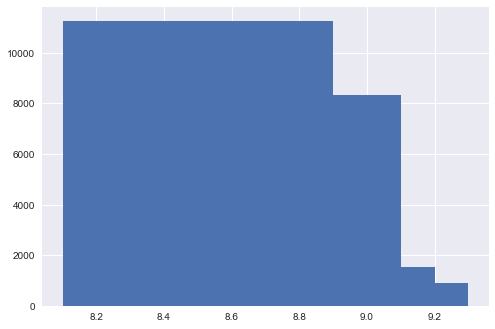

In [16]:
fig, ax = plt.subplots()
ax.bar(x,y)


In [17]:
movie_db_df.shape

(20, 14)

In [18]:
url2_genre_codes = 'https://api.themoviedb.org/3/genre/movie/list?api_key=8fbf14afe1d30e175fca8b7efcce5bd2&language=en-US'
response_2 = requests.get(url2_genre_codes)

In [19]:
response_2.status_code

200

In [20]:
print(response_2)

<Response [200]>


In [21]:
response_2.text

'{"genres":[{"id":28,"name":"Action"},{"id":12,"name":"Adventure"},{"id":16,"name":"Animation"},{"id":35,"name":"Comedy"},{"id":80,"name":"Crime"},{"id":99,"name":"Documentary"},{"id":18,"name":"Drama"},{"id":10751,"name":"Family"},{"id":14,"name":"Fantasy"},{"id":36,"name":"History"},{"id":27,"name":"Horror"},{"id":10402,"name":"Music"},{"id":9648,"name":"Mystery"},{"id":10749,"name":"Romance"},{"id":878,"name":"Science Fiction"},{"id":10770,"name":"TV Movie"},{"id":53,"name":"Thriller"},{"id":10752,"name":"War"},{"id":37,"name":"Western"}]}'

In [22]:
json.loads(response_2.text)

{'genres': [{'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'},
  {'id': 16, 'name': 'Animation'},
  {'id': 35, 'name': 'Comedy'},
  {'id': 80, 'name': 'Crime'},
  {'id': 99, 'name': 'Documentary'},
  {'id': 18, 'name': 'Drama'},
  {'id': 10751, 'name': 'Family'},
  {'id': 14, 'name': 'Fantasy'},
  {'id': 36, 'name': 'History'},
  {'id': 27, 'name': 'Horror'},
  {'id': 10402, 'name': 'Music'},
  {'id': 9648, 'name': 'Mystery'},
  {'id': 10749, 'name': 'Romance'},
  {'id': 878, 'name': 'Science Fiction'},
  {'id': 10770, 'name': 'TV Movie'},
  {'id': 53, 'name': 'Thriller'},
  {'id': 10752, 'name': 'War'},
  {'id': 37, 'name': 'Western'}]}

In [23]:
movie_db_genre = response_2.text
movie_db_genre = json.loads(movie_db_genre)

In [24]:
movie_db_genre

{'genres': [{'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'},
  {'id': 16, 'name': 'Animation'},
  {'id': 35, 'name': 'Comedy'},
  {'id': 80, 'name': 'Crime'},
  {'id': 99, 'name': 'Documentary'},
  {'id': 18, 'name': 'Drama'},
  {'id': 10751, 'name': 'Family'},
  {'id': 14, 'name': 'Fantasy'},
  {'id': 36, 'name': 'History'},
  {'id': 27, 'name': 'Horror'},
  {'id': 10402, 'name': 'Music'},
  {'id': 9648, 'name': 'Mystery'},
  {'id': 10749, 'name': 'Romance'},
  {'id': 878, 'name': 'Science Fiction'},
  {'id': 10770, 'name': 'TV Movie'},
  {'id': 53, 'name': 'Thriller'},
  {'id': 10752, 'name': 'War'},
  {'id': 37, 'name': 'Western'}]}

In [25]:
for key in movie_db_genre.keys():
    print(key)

genres


In [26]:
movie_db_genre['genres']

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 80, 'name': 'Crime'},
 {'id': 99, 'name': 'Documentary'},
 {'id': 18, 'name': 'Drama'},
 {'id': 10751, 'name': 'Family'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 36, 'name': 'History'},
 {'id': 27, 'name': 'Horror'},
 {'id': 10402, 'name': 'Music'},
 {'id': 9648, 'name': 'Mystery'},
 {'id': 10749, 'name': 'Romance'},
 {'id': 878, 'name': 'Science Fiction'},
 {'id': 10770, 'name': 'TV Movie'},
 {'id': 53, 'name': 'Thriller'},
 {'id': 10752, 'name': 'War'},
 {'id': 37, 'name': 'Western'}]

In [27]:
movie_db_genre_df = pd.DataFrame(movie_db_genre['genres'])
movie_db_genre_df

,id,name
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime
5,99,Documentary
6,18,Drama
7,10751,Family
8,14,Fantasy
9,36,History


In [28]:
movie_db_df.dtypes

popularity           float64
id                     int64
video                   bool
vote_count             int64
vote_average         float64
title                 object
release_date          object
original_language     object
original_title        object
genre_ids             object
backdrop_path         object
adult                   bool
overview              object
poster_path           object
dtype: object

In [29]:
movie_db_genre_df.dtypes

id       int64
name    object
dtype: object

In [30]:
movie_db_df['genre_ids'] = movie_db_df['genre_ids'].astype(str) 

In [31]:
movie_db_df['genre_ids'] = movie_db_df['genre_ids'].str.replace('[', '')

In [32]:
movie_db_df['genre_ids'] = movie_db_df['genre_ids'].str.replace(']', '')

ValueError: invalid literal for int() with base 10: '35, 18'

In [ ]:
movie_db_df.head()

In [ ]:
m = movie_db_genre_df.set_index('id')['name'].to_dict()
v = movie_db_df.filter(like='genre_ids')
movie_db_df[v.columns] = v.replace(m)

In [ ]:
movie_db_df